# Failure In Faulty Transformer Analysis
<img src='transformer_img.png'>

<h3> <strong>Context </strong> </h3>
<hr>
A transformer can fail for a variety of reasons, but the most common causes include lightning strikes, overloading, wear and corrosion, power surges, and moisture. Regardless of the cause, the result can be remarkable. Transformers contain mineral oil keeping the transformer cool. When it becomes overcharged, the wiring can create heat and a spark. This massive overpressure may eventually cause the transformer to rupture with a loud boom, flash, and possibly a fireball that can create a large plume of smoke that can be seen from a long distance.


<h3> <strong>Content </strong> </h3>
<hr>
Health index and power transformers result in a CSV file with 16 features. All Features are self-explanatory.

<h3> <strong>Acknowledgements </strong> </h3>
<hr>
Arias Velásquez, Ricardo Manuel; Mejia Lara, Jennifer (2020), “Data for: Root cause analysis improved with machine learning for failure analysis in power transformers”, Mendeley Data, V1, doi: 10.17632/rz75w3fkxy.1

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
# create data dictionary to extract/quick lookup on data feature meaning.

In [3]:
#load the data
data = pd.read_csv('Health index1.csv')

In [4]:
data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [5]:
# get brief info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

**Create the data dictionary**

In [6]:
# prepare the data dictionary for each colums
# note some columns are self explanatory so the definition might be the same with the column name
data_dict = dict()
# first initialize the columns name as dictionary definition
for item in data.columns:
    data_dict[item] = item +' in transformer'

In [7]:
# preview data dictionary 
data_dict

{'Hydrogen': 'Hydrogen in transformer',
 'Oxigen': 'Oxigen in transformer',
 'Nitrogen': 'Nitrogen in transformer',
 'Methane': 'Methane in transformer',
 'CO': 'CO in transformer',
 'CO2': 'CO2 in transformer',
 'Ethylene': 'Ethylene in transformer',
 'Ethane': 'Ethane in transformer',
 'Acethylene': 'Acethylene in transformer',
 'DBDS': 'DBDS in transformer',
 'Power factor': 'Power factor in transformer',
 'Interfacial V': 'Interfacial V in transformer',
 'Dielectric rigidity': 'Dielectric rigidity in transformer',
 'Water content': 'Water content in transformer',
 'Health index': 'Health index in transformer',
 'Life expectation': 'Life expectation in transformer'}

In [8]:
# modify dictionary to get more definition on the column
data_dict['Dielectric rigidity'] = 'The Dielectric strength of transformer oil is also known as the breakdown voltage of the transformer oil.  “Breakdown Voltage” (BDV) is measured by observing the voltage that is required to jump a spark between two electrodes immersed in the oil separated by a specific gap or distance'
data_dict['Power factor'] = 'Power factior is the ratio of real power flowing to the load and apparent power to the circuit.'
data_dict['DBDS'] = 'Dibenzyl Disulfide (DBDS) is one of several sulfur compounds known to cause copper corrosion in transformers. Breakdown of the DBDS to benzyl mercaptan or a DBDS-Copper complex can still cause corrosion of copper and the formation of copper sulfide'
data_dict['Interfacial V'] = 'Interfacial tension describes the tension of the interface between two liquids, in this case between water and oil.'
data_dict['Health index'] = 'Health / global state of power transformer scale 0-100'

In [9]:
# create data dictionary lookup function

def df_dictionary(col):
    
    try:
        print(data_dict[col])
    except:
        print('Column not found.')
    

In [10]:
df_dictionary('Power factor')

Power factior is the ratio of real power flowing to the load and apparent power to the circuit.


data dictionary created we can use it to look up about a column.

## Exploratory Data Analysis (EDA)

In [11]:
# get description of the numeric variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hydrogen,470.0,404.261702,2002.142678,0.00,4.00,9.0,34.00,23349.0
Oxigen,470.0,8357.372340,14164.233283,57.00,496.00,3810.0,14875.00,249900.0
Nitrogen,470.0,47759.561702,13760.451816,3600.00,41700.00,49100.0,55875.00,85300.0
Methane,470.0,79.695745,489.320336,0.00,2.00,3.0,7.00,7406.0
CO,470.0,244.000000,237.267485,10.00,66.00,150.5,361.75,1730.0
CO2,470.0,1816.414894,2256.790519,48.00,641.75,1125.0,2257.50,24900.0
Ethylene,470.0,162.923404,1323.811504,0.00,0.00,3.0,6.00,16684.0
Ethane,470.0,81.940426,342.573636,0.00,0.00,4.0,69.75,5467.0
Acethylene,470.0,91.491489,644.365828,0.00,0.00,0.0,0.00,9740.0
DBDS,470.0,17.036596,46.735057,0.00,0.00,0.0,2.00,227.0


<AxesSubplot:>

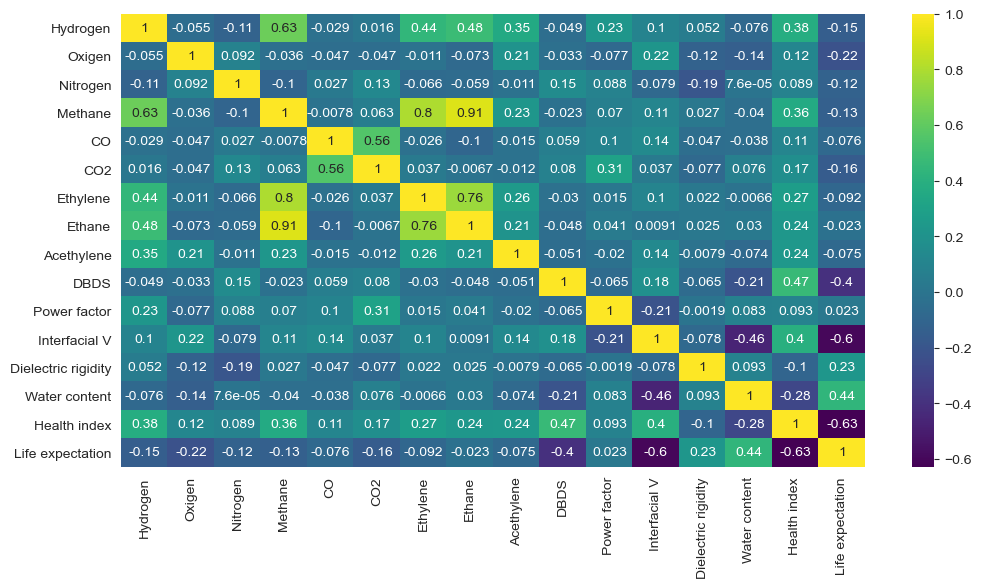

In [12]:
# check out the correlation among each other
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(data.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='Hydrogen', ylabel='Methane'>

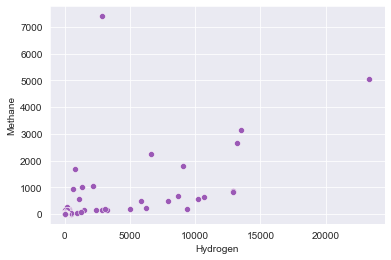

In [13]:
sns.scatterplot(data=data,y='Methane',x='Hydrogen')

**there seems to be a slight linear relationship between hydrogren and methane. as the hydrogren increase so does the methane**

In [14]:
#sns.pairplot(data,corner=True,palette='viridis')

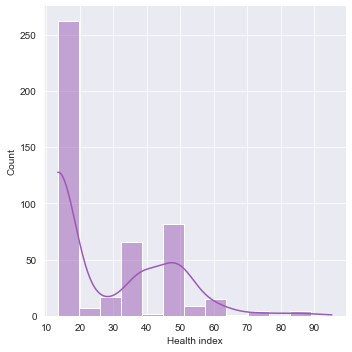

In [15]:
sns.displot(data=data,x='Health index',kde=True)

**we can see that the distribution for the health index is more concetrated around 10 - 20, it is also right skewed**

### check for outliers

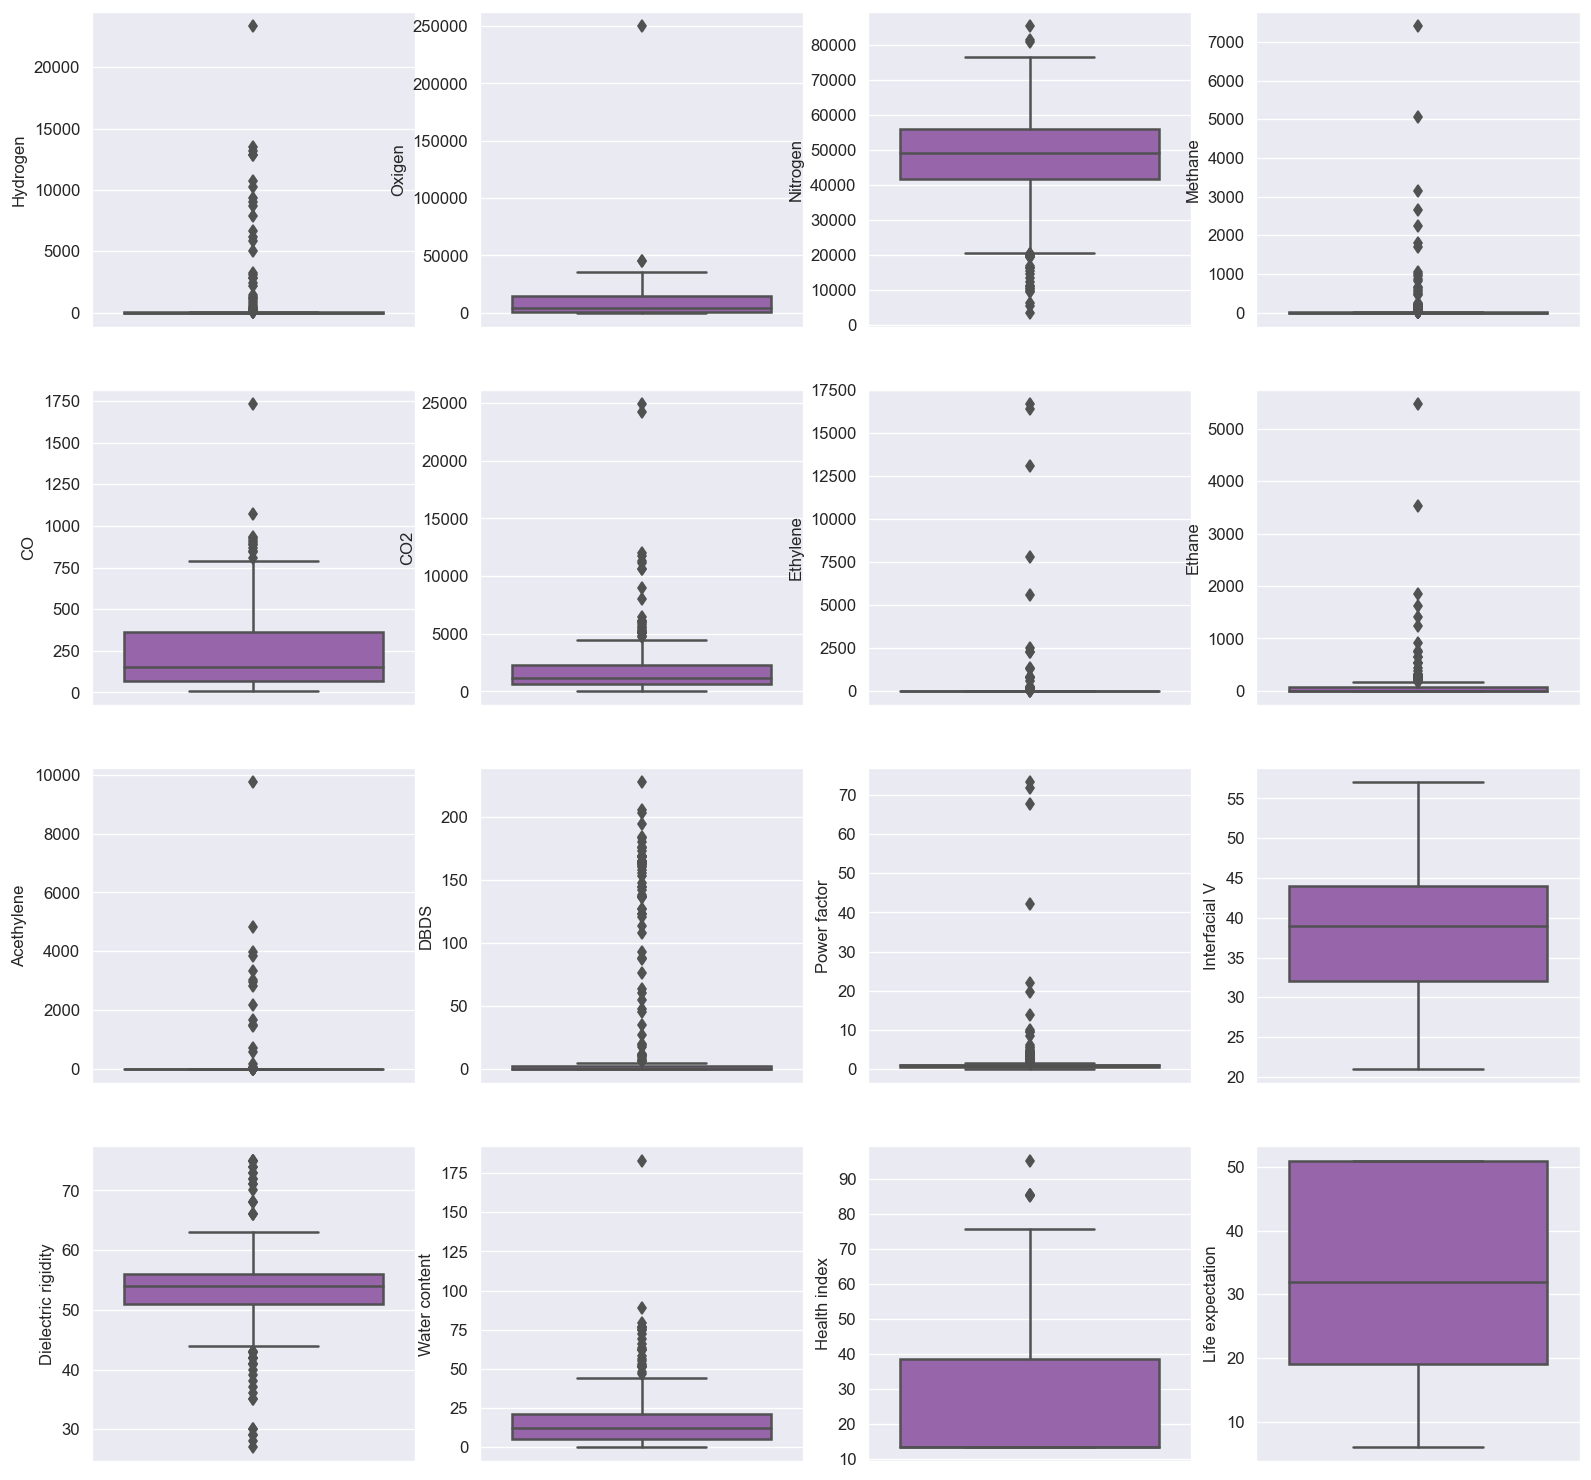

In [16]:
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(16,16),dpi=120)

cols = data.columns
j= 0
for i in range(4):
    for k in range(4):
        sns.boxplot(y = data[cols[j]],ax=axes[i][k])
        j +=1


**from the above we can deduce that 75% of this dataset have outliers, large shares of outliers for each of the columns.
this can be due to low dataset input, if we decide to drop these outlier we might be left with nothing in the dataset, we can best resolute in the preprocessing stage by scaling the variables.**

In [17]:
df_dictionary('Ethane')
df_dictionary('Ethylene')
data['Life expectation']

Ethane in transformer
Ethylene in transformer


0      19.0
1      19.0
2      19.0
3       6.0
4       6.0
       ... 
465    51.0
466    51.0
467     6.5
468    51.0
469    51.0
Name: Life expectation, Length: 470, dtype: float64

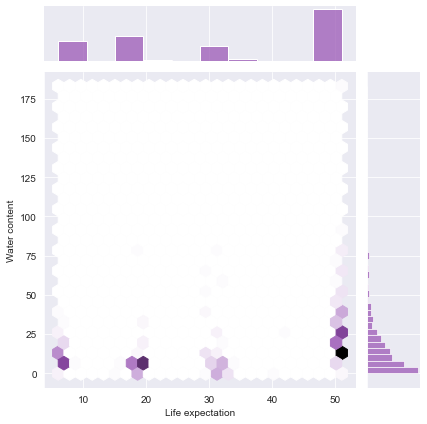

In [18]:
sns.jointplot(data=data,y='Water content',x='Life expectation',kind='hex')

**life expectation seems to be ordinal and more heated around the 50+. water content is more concentrated around the 0-25**

In [19]:
# view the health index that are more that the 75th percentile
data[data['Health index'] >38.55]

# output show that there are more than 118 records above the 38.55 health index

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,2359,31861,2,144,707,0,0,0,0.0,1.00,42,75,28,47.9,31.3
114,1450,13000,55800,157,278,3360,82,75,0,3.0,13.80,36,56,6,46.6,7.8
115,81,23790,64479,10,852,1371,0,0,0,5.0,0.06,47,74,4,45.3,18.8
116,67,5940,41600,14,930,4030,0,5,0,5.0,0.15,43,50,2,40.0,32.0


### Preprocessing

### train test split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = data.drop('Health index',axis=1)
y = data['Health index']

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=101)

In [23]:
# check if the greate than the 75th percentile is appropriate in both  training and test data
print('greater than 38.55 in training ylabel {}'.format((y_train > 38.55).sum()))
print('greater than 38.55 in testing ylabel {}'.format((y_test > 38.55).sum()))

greater than 38.55 in training ylabel 100
greater than 38.55 in testing ylabel 18


### scaling 

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build model

In [26]:
# lets try a linear regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg_model = LinearRegression()

In [29]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = reg_model.predict(X_test)

### evaluate model

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [32]:
print('mae: ', mean_absolute_error(y_test,y_pred))
print('mse: ', mean_squared_error(y_test,y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2score: ', r2_score(y_test,y_pred))

mae:  8.079311833127502
mse:  130.88844246187884
rmse:  11.440648690606615
r2score:  0.5898958838651496


In [33]:
# look at the mean to see how far it is from the mean absolute error
data['Health index'].mean()

27.504042553191308

<AxesSubplot:xlabel='Health index', ylabel='Count'>

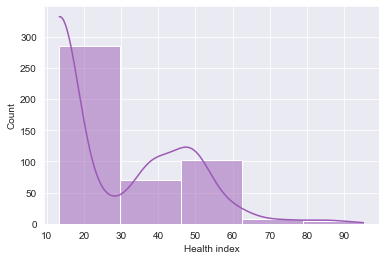

In [34]:
sns.histplot(data['Health index'],bins=5,kde=True)

In [35]:
# calculate the residuals
residuals = y_test-y_pred

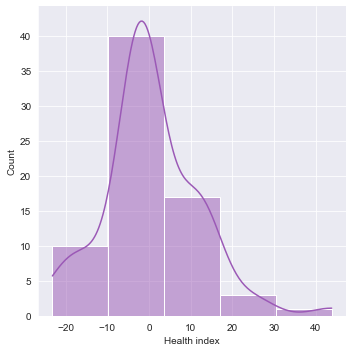

In [36]:
# the residuals is more concetrate around the 0 which isn't too bad for the model
# we had an r2score of over 58 %
sns.displot(residuals,bins=5,kde=True)

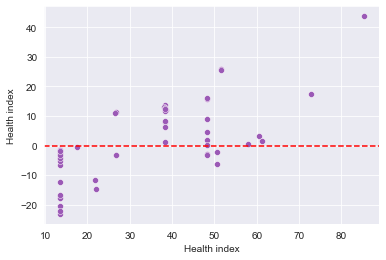

In [37]:
sns.scatterplot(x = y_test,y= residuals)
plt.axhline(y=0,color ='red',ls='--');

## let's explore other models 